In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv'

In [3]:
df = pd.read_csv(data_url)

In [4]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


### Attribute Information:

11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
5. stabf: the stability label of the system (categorical: stable/unstable)



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

### As given in the attribute information stab is the encoding of stabf, So we can drop stab column

In [8]:
df = df.drop('stab', axis = 1)

In [9]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

In [10]:
#Encoding stabf
le = preprocessing.LabelEncoder()
le.fit(df.stabf)
df.stabf = le.transform(df.stabf)
df.stabf.nunique()

2

In [11]:
X = df.drop('stabf',axis = 1)
y = df.stabf

In [12]:
X.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4'],
      dtype='object')

In [13]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: stabf, dtype: int64

## Spliting the dataset 

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
# normalising X train and X test as Y is object dataType
scaler = preprocessing.StandardScaler()
norm_df_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

norm_df_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [16]:
norm_df_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [17]:
norm_df_test.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.592163,-0.420565,1.472472,1.093036,0.426786,-1.504594,-0.792677,1.600201,-0.925703,1.175287,-1.492644,1.086291
1,0.199183,0.364543,-0.190076,-0.518473,-0.229402,-1.071766,0.427103,1.052337,-1.655910,-0.395949,1.412703,1.227535
2,-1.086035,-0.321834,-0.873505,0.011761,-0.977094,0.094896,0.813041,0.751381,1.450284,-1.444370,0.654216,-1.679799
3,-0.087014,-1.113357,0.361518,-1.684316,0.792280,-1.649041,0.410662,-0.084473,0.066085,-1.679450,-0.349573,1.057439
4,0.873004,1.425833,0.080476,1.681022,-0.154247,-0.024315,-0.197525,0.485988,0.119716,-1.475773,0.957057,-0.817608


## Building Model using various Method

### Q.14

In [18]:
#Using Random Forest classifier for training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(norm_df_train,y_train)

RandomForestClassifier(random_state=1)

In [19]:
rf_pred = rf.predict(norm_df_test)

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [21]:
#model accuracy
accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy: {}'.format(round(accuracy*100), 4))

#precision
precision = precision_score(y_test, rf_pred, pos_label = 1)
print('Precision: {}'.format(round(precision*100), 2))  

#recall
recall = recall_score(y_test, rf_pred, pos_label = 1)
print('Recall: {}'.format(round(recall*100), 2))

# F1 score
f1 = f1_score(y_test, rf_pred, pos_label = 1)
print('F1: {}'.format(round(f1*100), 2))

# Classification report
print('Classification Report:\n', classification_report(y_test, rf_pred, digits = 4))

Accuracy: 93
Precision: 93
Recall: 96
F1: 94
Classification Report:
               precision    recall  f1-score   support

           0     0.9176    0.8764    0.8966       712
           1     0.9333    0.9565    0.9448      1288

    accuracy                         0.9280      2000
   macro avg     0.9255    0.9165    0.9207      2000
weighted avg     0.9277    0.9280    0.9276      2000



In [22]:
print("score of train set: {:.3f}".format(rf.score(norm_df_train, y_train)))
print("score of test set: {:.3f}".format(rf.score(norm_df_test, y_test)))

score of train set: 1.000
score of test set: 0.928


### Q.15

In [23]:
# Using XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1)

xgb.fit(norm_df_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [24]:
xgb_pred = xgb.predict(norm_df_test)

In [25]:
#Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print('Accuracy: {}'.format(round(xgb_accuracy*100), 2))

# Precision
xgb_precision = precision_score(y_test, xgb_pred, pos_label = 1)
print('Precision: {}'.format(round(xgb_precision*100), 2))  

# Recall
xgb_recall = recall_score(y_test, xgb_pred, pos_label = 1)
print('Recall: {}'.format(round(xgb_recall*100), 2))

# F1 score
xgb_f1 = f1_score(y_test, xgb_pred, pos_label = 1)
print('F1: {}'.format(round(xgb_f1*100), 2))

# Classification report
print('Classification Report:\n', classification_report(y_test, xgb_pred, digits = 4))

Accuracy: 95
Precision: 95
Recall: 97
F1: 96
Classification Report:
               precision    recall  f1-score   support

           0     0.9377    0.9087    0.9230       712
           1     0.9504    0.9666    0.9584      1288

    accuracy                         0.9460      2000
   macro avg     0.9440    0.9377    0.9407      2000
weighted avg     0.9459    0.9460    0.9458      2000



In [26]:
# Using ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state = 1)

etc.fit(norm_df_train, y_train)

ExtraTreesClassifier(random_state=1)

In [27]:
etc_pred = etc.predict(norm_df_test)

In [28]:
# Model accuracy
etc_accuracy = accuracy_score(y_test, etc_pred)
print('Accuracy: {}'.format(round(etc_accuracy*100), 2))

# Precision
etc_precision = precision_score(y_test, etc_pred, pos_label = 1)
print('Precision: {}'.format(round(etc_precision*100), 2))  

# Recall
etc_recall = recall_score(y_test, etc_pred, pos_label = 1)
print('Recall: {}'.format(round(etc_recall*100), 2))

# F1 score
etc_f1 = f1_score(y_test, etc_pred, pos_label = 1)
print('F1: {}'.format(round(etc_f1*100), 2))

# Classification report
print('Classification Report:\n', classification_report(y_test, etc_pred, digits = 4))

Accuracy: 93
Precision: 92
Recall: 97
F1: 94
Classification Report:
               precision    recall  f1-score   support

           0     0.9406    0.8455    0.8905       712
           1     0.9191    0.9705    0.9441      1288

    accuracy                         0.9260      2000
   macro avg     0.9299    0.9080    0.9173      2000
weighted avg     0.9268    0.9260    0.9250      2000



In [29]:
print("score of train set: {:.3f}".format(etc.score(norm_df_train, y_train)))
print("score of test set: {:.3f}".format(etc.score(norm_df_test, y_test)))

score of train set: 1.000
score of test set: 0.926


### Q.16

In [30]:
# Using LightGBM Classifier for model
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state = 1)

lgbm.fit(norm_df_train, y_train)

LGBMClassifier(random_state=1)

In [31]:
lgbm_pred = lgbm.predict(norm_df_test)

In [32]:
#model accuracy
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
print('Accuracy: {}'.format(round(lgbm_accuracy*100), 2))

#precision
lgbm_precision = precision_score(y_test, lgbm_pred, pos_label = 1)
print('Precision: {}'.format(round(lgbm_precision*100), 2))  

#recall
lgbm_recall = recall_score(y_test, lgbm_pred, pos_label = 1)
print('Recall: {}'.format(round(lgbm_recall*100), 2))

#F1 score
lgbm_f1 = f1_score(y_test, lgbm_pred, pos_label = 1)
print('F1: {}'.format(round(lgbm_f1*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test, lgbm_pred, digits = 4))

Accuracy: 94
Precision: 94
Recall: 96
F1: 95
Classification Report:
               precision    recall  f1-score   support

           0     0.9258    0.8933    0.9092       712
           1     0.9421    0.9604    0.9512      1288

    accuracy                         0.9365      2000
   macro avg     0.9339    0.9268    0.9302      2000
weighted avg     0.9363    0.9365    0.9362      2000



### Q.20

In [33]:
importance = etc.feature_importances_

In [34]:
# Print feature importances
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11740
Feature: 1, Score: 0.11844
Feature: 2, Score: 0.11317
Feature: 3, Score: 0.11547
Feature: 4, Score: 0.03951
Feature: 5, Score: 0.04037
Feature: 6, Score: 0.04071
Feature: 7, Score: 0.04058
Feature: 8, Score: 0.08978
Feature: 9, Score: 0.09368
Feature: 10, Score: 0.09688
Feature: 11, Score: 0.09402


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_importance(columns, importances, n=12):
    df = pd.DataFrame(
        {'features' : columns, 'feature_importance' : importances}).sort_values(
                                                    'feature_importance', ascending=False).reset_index(drop=False)
    
    # Plotting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x ='feature_importance', y='features', data=df[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importance')


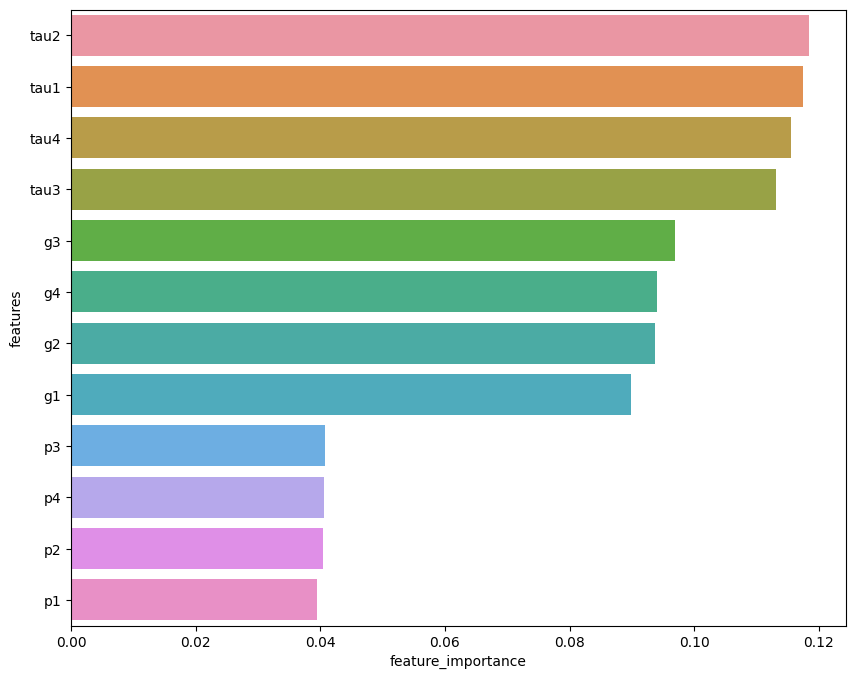

In [36]:
# Plot the feature importances
plot_importance(norm_df_train.columns, etc.feature_importances_)